In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [13]:
start = '2012-01-01'
end = '2023-12-21'

stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [14]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055


In [15]:
data.reset_index(inplace=True)

In [16]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-03-27,28.322241,28.322241,27.570307,27.846546,27.814894,262719
1,2014-03-28,27.983171,28.243956,27.857019,27.922838,27.891100,824257
2,2014-03-31,28.266893,28.272379,27.770258,27.772251,27.740683,216593
3,2014-04-01,27.859013,28.344681,27.859013,28.280355,28.248211,158434
4,2014-04-02,29.917362,30.158699,28.032537,28.272379,28.240242,2942055
...,...,...,...,...,...,...,...
2447,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.048599,29619100
2448,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.687866,58569400
2449,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.034058,25699800
2450,2023-12-19,138.000000,138.770004,137.449997,138.100006,137.943039,20661000


In [17]:
ma_100_days = data.Close.rolling(100).mean() #100 days moving average

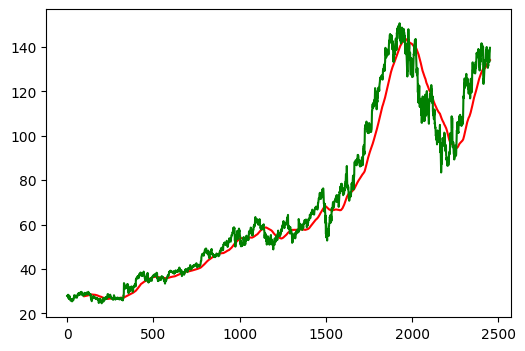

In [23]:
plt.figure(figsize=(6,4))
plt.plot(ma_100_days,'r')
plt.plot(data.Close, 'g' )
plt.show()

In [25]:
ma_200_days = data.Close.rolling(200).mean() #200 days moving average

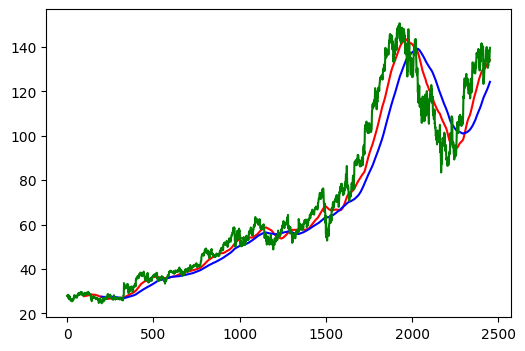

In [27]:
plt.figure(figsize=(6,4))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close, 'g' )
plt.show()

In [28]:
data.dropna(inplace=True)

In [37]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [38]:
data_train.shape

(1961, 1)

In [39]:
data_test.shape

(491, 1)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [44]:
data_train_scale = scaler.fit_transform(data_train)

In [46]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [101]:
x,y = np.array(x),np.array(y)

In [56]:
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [57]:
model = Sequential()

model.add(LSTM(units=50,activation='relu', return_sequences=True,input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=40,activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [67]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [66]:
model.fit(x, y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
59/59 [==============================] - 20s 250ms/step - loss: 0.0300 - mae: 0.1116
Epoch 2/50
59/59 [==============================] - 15s 252ms/step - loss: 0.0064 - mae: 0.0533
Epoch 3/50
59/59 [==============================] - 15s 244ms/step - loss: 0.0060 - mae: 0.0507
Epoch 4/50
59/59 [==============================] - 14s 244ms/step - loss: 0.0049 - mae: 0.0447
Epoch 5/50
59/59 [==============================] - 14s 244ms/step - loss: 0.0042 - mae: 0.0410
Epoch 6/50
59/59 [==============================] - 14s 243ms/step - loss: 0.0054 - mae: 0.0494
Epoch 7/50
59/59 [==============================] - 14s 245ms/step - loss: 0.0040 - mae: 0.0401
Epoch 8/50
59/59 [==============================] - 14s 245ms/step - loss: 0.0035 - mae: 0.0376
Epoch 9/50
59/59 [==============================] - 14s 243ms/step - loss: 0.0036 - mae: 0.0376
Epoch 10/50
59/59 [==============================] - 14s 243ms/step - loss: 0.0029 - mae: 0.0351
Epoch 11/50
59/59 [====================

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 40)           16160     
                                                                 
 dropout_6 (Dropout)         (None, 100, 40)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [91]:
pas_100_days = data_train.tail(100)

In [92]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [93]:
data_test_scale = scaler.fit_transform(data_test)

In [94]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [95]:
y_predict = model.predict(x)

19/19 [==============================] - 1s 64ms/step


In [96]:
scale =1/scaler.scale_

In [97]:
y_predict =y_predict * scale

In [98]:
y = y *scale

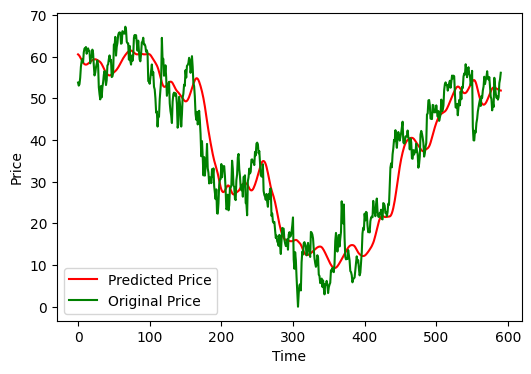

In [99]:
plt.figure(figsize=(6,4))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [100]:
model.save('Stock Predictions Model.keras')